## Looking at trends in Afforestation/Reforestation credits

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

import scipy.stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_credits_issued_by_vintage_year = pd.read_csv('data/df_credits_issued_by_vintage_year')
df_credits_issued_by_vintage_year

,Project ID,Project Name,Type,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ACR101,AFOVERT Energy,Bundled Energy Efficiency,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACR102,Air Bag Gas Substitution,SF6 Replacement,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ACR103,Inland Empire Anaerobic Ag Digester,Manure Methane Digester,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ACR104,Ankotrofotsy Community-based Reforestation and...,Afforestation/Reforestation,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ACR105,Boa Vista A/R,Afforestation/Reforestation,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7928,VCS997,Xinjiang Kaiduhe River Chahan Wusu Hydropower ...,Hydropower,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7929,VCS998,01 million Compact Fluorescent Lamps (EVN-2010...,Lighting,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7930,VCS999,Protection of the Amazon Rain Forest II,REDD+,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7931,VCSOPR10,Blue Source – Alford Improved Forest Managemen...,Improved Forest Management,0,0,0,0,0,0,0,...,0,0,0,0,78497,0,0,0,0,0


In [3]:
aforestation_df = df_credits_issued_by_vintage_year[df_credits_issued_by_vintage_year[' Type'] == 'Afforestation/Reforestation']
aforestation_df

,Project ID,Project Name,Type,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,ACR104,Ankotrofotsy Community-based Reforestation and...,Afforestation/Reforestation,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ACR105,Boa Vista A/R,Afforestation/Reforestation,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,ACR108,San Juan National Forest Carbon Demonstration ...,Afforestation/Reforestation,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,ACR114,GreenTrees ACRE (Advanced Carbon Restored Ecos...,Afforestation/Reforestation,0,0,0,0,0,0,0,...,477297,182626,1054928,165976,1107890,307508,1362647,1179164,0,0
14,ACR115,Lower Mississippi Valley Reforestation,Afforestation/Reforestation,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7917,VCS987,Reforestation of Degraded Forest Reserves in G...,Afforestation/Reforestation,0,0,0,0,0,0,0,...,0,0,0,0,0,207332,140183,0,414333,0
7924,VCS993,"TIST Program in Uganda, VCS 005",Afforestation/Reforestation,0,0,0,0,0,0,0,...,0,0,0,0,464116,0,111073,0,0,0
7925,VCS994,"TIST Program in India, VCS 001",Afforestation/Reforestation,0,0,0,0,0,0,0,...,0,0,0,0,93207,0,0,0,98536,0
7926,VCS995,"TIST Program in Uganda, VCS 006",Afforestation/Reforestation,0,0,0,0,0,0,0,...,0,0,0,0,96491,0,43372,0,0,0


In [4]:
aforestation_df = pd.melt(aforestation_df, id_vars=['Project ID', 'Project Name'], var_name='Year', value_name='Value')

aforestation_df['Year'] = pd.to_numeric(aforestation_df['Year'], errors='coerce')

aforestation_df_yearly_sums = aforestation_df.groupby('Year')['Value'].sum()
aforestation_df_yearly_sums

Year
1996.0        764
1997.0       1605
1998.0       1898
1999.0       2988
2000.0       3864
2001.0       4468
2002.0      12241
2003.0      37956
2004.0      39509
2005.0      54306
2006.0      73461
2007.0     103772
2008.0     326293
2009.0     635698
2010.0    1084016
2011.0    6718689
2012.0    2916581
2013.0    4443430
2014.0    2882078
2015.0    3441224
2016.0    3453877
2017.0    6313864
2018.0    5422167
2019.0    8676776
2020.0    7994213
2021.0    4769475
2022.0          0
Name: Value, dtype: object

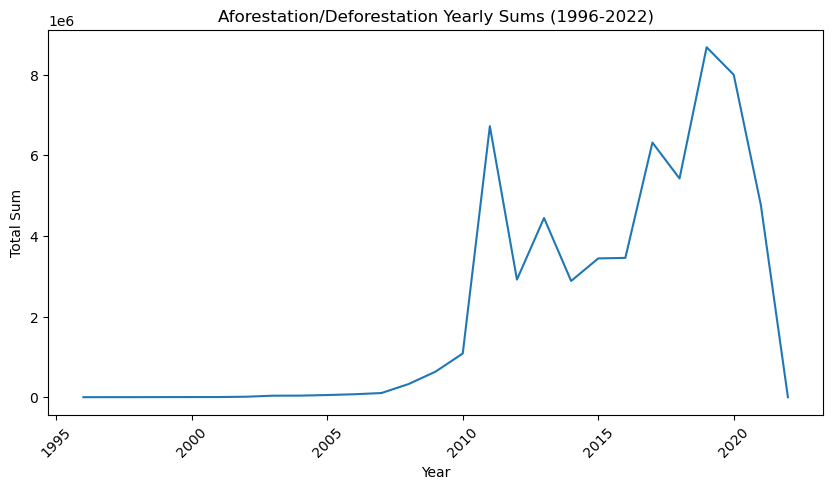

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(aforestation_df_yearly_sums.index, aforestation_df_yearly_sums.values)
plt.title('Aforestation/Deforestation Yearly Sums (1996-2022)')
plt.xlabel('Year')
plt.ylabel('Total Sum')
plt.xticks(rotation=45)
plt.show()

## Looking at the main types of credits

In [6]:
type_list = df_credits_issued_by_vintage_year[' Type'].unique()
type_list

array(['Bundled Energy Efficiency', 'SF6 Replacement',
       'Manure Methane Digester', 'Afforestation/Reforestation',
       'Landfill Methane', 'Fuel Switching', 'Pneumatic Retrofit',
       'Carbon Capture & Enhanced Oil Recovery', 'Fleet Efficiency',
       'Solar - Distributed', 'Truck Stop Electrification',
       'Methane Recovery in Wastewater', 'Energy Efficiency',
       'N2O Destruction in Adipic Acid Production',
       'Ozone Depleting Substances Recovery & Destruction',
       'Nitrogen Management', 'Improved Forest Management', 'Hydropower',
       'Wind', 'Rice Emission Reductions', 'Biomass', 'Composting',
       'Avoided Grassland Conversion', 'Oil Recycling',
       'Mine Methane Capture', 'Avoided Forest Conversion',
       'HFC Refrigerant Reclamation',
       'HFC Replacement in Foam Production', 'Wetland Restoration',
       'Sustainable Agriculture', 'Compost Addition to Rangeland',
       'Advanced Refrigerants',
       'N2O Destruction in Nitric Acid Producti

In [7]:
for type in type_list:
    type = df_credits_issued_by_vintage_year[df_credits_issued_by_vintage_year[' Type'] == type]
    type = pd.melt(type, id_vars=['Project ID', 'Project Name'], var_name='Year', value_name='Value')

    type['Year'] = pd.to_numeric(type['Year'], errors='coerce')

    type = type.groupby('Year')['Value'].sum()

In [8]:
combined_df = pd.DataFrame()

for project_type in type_list:
    type_df = df_credits_issued_by_vintage_year[df_credits_issued_by_vintage_year[' Type'] == project_type]

    type_df = pd.melt(type_df, id_vars=['Project ID', 'Project Name'], var_name='Year', value_name='Value')
    type_df['Year'] = pd.to_numeric(type_df['Year'], errors='coerce')
    type_df_yearly_sums = type_df.groupby('Year')['Value'].sum()

    combined_df[project_type] = type_df_yearly_sums

combined_df = combined_df.reset_index()
combined_df.columns = ['Year'] + combined_df.columns.tolist()[1:]
combined_df

,Year,Bundled Energy Efficiency,SF6 Replacement,Manure Methane Digester,Afforestation/Reforestation,Landfill Methane,Fuel Switching,Pneumatic Retrofit,Carbon Capture & Enhanced Oil Recovery,Fleet Efficiency,...,Sustainable Grassland Management,Propylene Oxide Production,Aluminum Smelters Emission Reductions,Fuel Transport,Bicycles,Carbon Capture in Plastic,Bundled Compost Production and Soil Application,Carbon Capture in Cement,HFC23 Destruction,Refrigerant Leak Detection
0,1996.0,0,0,0,764,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1997.0,0,0,0,1605,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1998.0,0,0,0,1898,48826,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1999.0,0,0,0,2988,74895,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000.0,0,0,0,3864,114507,0,0,991518,0,...,0,0,0,0,0,0,0,0,0,0
5,2001.0,0,0,0,4468,114478,0,0,718342,0,...,0,0,0,0,0,0,0,0,0,0
6,2002.0,0,0,0,12241,110796,0,0,736816,0,...,0,0,0,0,0,0,0,0,0,0
7,2003.0,0,1898382,8072,37956,332699,0,0,1322814,0,...,0,0,0,0,0,0,0,0,0,0
8,2004.0,0,3004613,5848,39509,359973,0,0,2739431,0,...,0,0,0,0,0,0,0,0,0,0
9,2005.0,0,3081011,4409,54306,467945,316,0,4129065,0,...,0,0,0,0,0,0,0,0,0,0


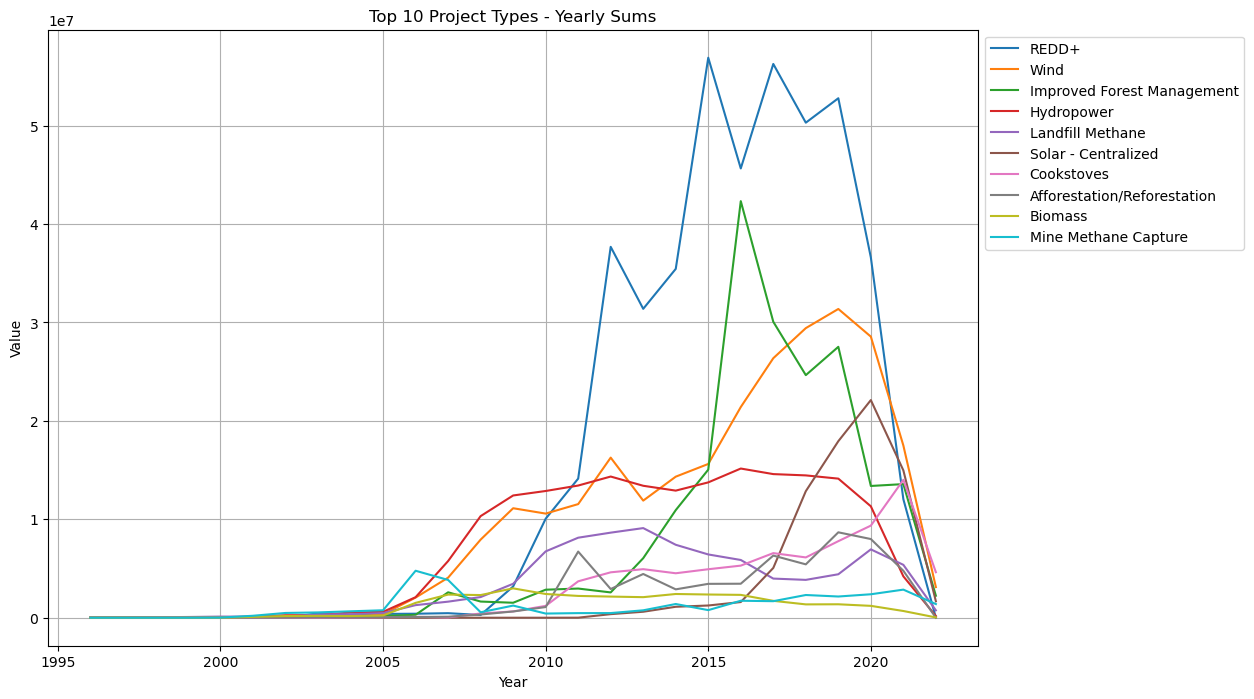

In [9]:
combined_df.set_index('Year', inplace=True)

top_10_types = combined_df.sum(axis=0).sort_values(ascending=False).head(10).index
top_10_df = combined_df[top_10_types]

plt.figure(figsize=(12, 8))

for project_type in top_10_df.columns:
    plt.plot(top_10_df.index, top_10_df[project_type], label=project_type)

plt.title('Top 10 Project Types - Yearly Sums')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the legend position if needed
plt.grid(True)
plt.savefig('types.png')
plt.show()
